# Pandas for Data Manipulation
### USI ARA AAM, Nov 19

## Notebook Material Credits
- Alfred Essa ( @alfessa )
- Harrison Kinsley ( @sentdex )
- Verena Kaynig-Fittkau (Harvard CS)

## What is pandas?

Pandas is one of the most popular tools for data wrangling in python. In essence, pandas is the equivalent of data frames in R. Additionally, it is tightly tied with numpy and matplotlib. This allows it to be readily amenable to modeling (in scikit-learn) and plotting.

## Importing modules

To start off we shall import the most basic modules that work with pandas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this allows you to plot and display within the notebook environment
%matplotlib inline    

# Pandas Series

The most basic pandas data structure is a *Series* object. A Series **ducktypes** as an numpy array as well as a dictionary. 

In [3]:
s1= pd.Series([33,19,15,89,11,-5,9])
print type(s1)
print s1
print s1[0],s1[3]

<class 'pandas.core.series.Series'>
0    33
1    19
2    15
3    89
4    11
5    -5
6     9
dtype: int64
33 89


## Index in a Series

A pandas Series has an **index** that you can optionally specify. If unspecified, it becomes a simple serial number like above. The index is like a reference to the row - it says what that entry is about. Here is an example of a Series that records the temperature on 7 days of a week. 

In [4]:
data1= [33,19,15,89,11,-5,9]
index1= ['mon','tue','wed','thu','fri','sat','sun']
s2= pd.Series(data1, index=index1)
print s2, "\n"

print s2['mon'], "\n"
print s2['wed':'fri'], "\n"
print s2[2:4]

mon    33
tue    19
wed    15
thu    89
fri    11
sat    -5
sun     9
dtype: int64 

33 

wed    15
thu    89
fri    11
dtype: int64 

wed    15
thu    89
dtype: int64


It is possible for you to give names to your index and data.

In [5]:
s2.name= 'Daily temperature'
s2.index.name= 'Weekday'
print s2

Weekday
mon    33
tue    19
wed    15
thu    89
fri    11
sat    -5
sun     9
Name: Daily temperature, dtype: int64


## Series from a dictionary

As you might have guessed by now, the reason Series behaves like a dictionary is because of this index. Thus, you can create a Series out of a dict, and the dict keys become the indices. There is a catch, though. Pandas will *rearrange* the indices in alphabetic / numeric sort order (which might not be what you wanted).

In [6]:
dict1= {'mon':33, 'tue':19.7, 'wed':15, 'thu':89, 'fri': 34, 'sat': 43, 'sun': 51}
s4= pd.Series(dict1)
print s4

fri    34.0
mon    33.0
sat    43.0
sun    51.0
thu    89.0
tue    19.7
wed    15.0
dtype: float64


To remedy this you need to specify the index in the way you want it, while the data can come from the dict. 

In [ ]:
s4= pd.Series(dict1, index= index1)
print s4

Just like a dict, you can iterate over the entries.

In [ ]:
for k,v in s4.iteritems():
    print k, v

Also, just like a dictionary, you can operate on the keys.

In [ ]:
print s4['thu'], "\n\n"
print s4[3], "\n\n"
print 'sun' in s4, "\n\n"
print 'moon' in s4

## Vectorized operations

Because Series is derived from  a numpy array, it allows numpy functions and vectorized operations. 

In [ ]:
print s4.sum(), "\n\n"
print s4.median(), "\n\n"
print s4.cumsum()

In [ ]:
print s4 **2, "\n\n"
print s4 + 100

You can also perform list comprehension

In [ ]:
new = [x**2 for x in s4]
print new
print s4

# Pandas DataFrame

While pandas Series are interesting, they are not too useful - you can make do with dicts and arrays ni place of Series. Pandas becomes really useful with its next datastructure - the *DataFrame*. DataFrame is a set of Series objects stacked horizontally together across a single index for each row. As you might imagine, this is essentially data like a spreadsheet, in rows and columns. This is the most common format data scientists use on a daily basis. 

You can create your own dataframes as demonstrated below. 

In [7]:
import datetime as dtm

dt= dtm.datetime(2014,12,1)
en= dtm.datetime(2014,12,8)
step= dtm.timedelta(days=1)
dates= []
while dt < en:
    dates.append(dt.strftime('%Y-%m-%d'))
    dt += step
print dates

['2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07']


In [8]:
t1= [15,19,15,11,9,8,13]
t2= [20,18,23,19,25,27,23]
t3= [-2,0,2,5,7,-5,-3]
d= {'Date': dates,'Tokyo': t1, 'Mumbai': t2, 'Paris': t3}
print d

{'Date': ['2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07'], 'Paris': [-2, 0, 2, 5, 7, -5, -3], 'Mumbai': [20, 18, 23, 19, 25, 27, 23], 'Tokyo': [15, 19, 15, 11, 9, 8, 13]}


In [9]:
temps= pd.DataFrame(d)
temps

,Date,Mumbai,Paris,Tokyo
0,2014-12-01,20,-2,15
1,2014-12-02,18,0,19
2,2014-12-03,23,2,15
3,2014-12-04,19,5,11
4,2014-12-05,25,7,9
5,2014-12-06,27,-5,8
6,2014-12-07,23,-3,13


Each column in the dataset is a Series, and it can be referenced using the column name.

In [10]:
print type(temps['Mumbai']) 

<class 'pandas.core.series.Series'>


You can define the index in the dataframe using the `set_index` command. Note that some pandas commands like `set_index` do not update the dataframe directly. So you have to over-write the dataframe for the changes to take effect. We shall see a different way of doing it shortly.

In [13]:
temps= temps.set_index('Date') 
#you cannot repeat this command!!
temps.head()

KeyError: 'Date'

## Rows and Columns

The most basic thing you want to do on the data frame is to be able to access its rows and columns for data. This can be done using column names and indices. 

In [14]:
days= pd.date_range('2014-01-01', '2014-03-01', freq= 'D')
dim= (60,5)
df= pd.DataFrame(np.random.random_integers(-20,40,dim),
                index= days,
                columns= ['Madrid','Boston','Tokyo','Shanghai','Kolkata'])
df.tail()

,Madrid,Boston,Tokyo,Shanghai,Kolkata
2014-02-25,-16,0,-17,24,32
2014-02-26,-10,22,-18,-19,-15
2014-02-27,3,16,19,-14,30
2014-02-28,-13,6,12,-9,28
2014-03-01,-9,19,29,-17,-18


In [18]:
print df.shape, "\n\n"
print len(df), "\n\n"
print df.columns.values, "\n\n"
print len(df.columns.values)

(60, 5) 


60 


['Madrid' 'Boston' 'Tokyo' 'Shanghai' 'Kolkata'] 


5


In [19]:
print df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10', '2014-01-11', '2014-01-12',
               '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16',
               '2014-01-17', '2014-01-18', '2014-01-19', '2014-01-20',
               '2014-01-21', '2014-01-22', '2014-01-23', '2014-01-24',
               '2014-01-25', '2014-01-26', '2014-01-27', '2014-01-28',
               '2014-01-29', '2014-01-30', '2014-01-31', '2014-02-01',
               '2014-02-02', '2014-02-03', '2014-02-04', '2014-02-05',
               '2014-02-06', '2014-02-07', '2014-02-08', '2014-02-09',
               '2014-02-10', '2014-02-11', '2014-02-12', '2014-02-13',
               '2014-02-14', '2014-02-15', '2014-02-16', '2014-02-17',
               '2014-02-18', '2014-02-19', '2014-02-20', '2014-02-21',
               '2014-02-22', '2014-02-23', '2014-02-24', '2014-02-25',
      

### Column Selection

You can select columns by referring to the column name. Use a list of columns to pick multiple columns - this returns a smaller dataframe.

In [20]:
print df.Madrid.head()

2014-01-01    10
2014-01-02     1
2014-01-03     5
2014-01-04     2
2014-01-05    15
Freq: D, Name: Madrid, dtype: int32


In [21]:
print df['Tokyo'].tail()

2014-02-25   -17
2014-02-26   -18
2014-02-27    19
2014-02-28    12
2014-03-01    29
Freq: D, Name: Tokyo, dtype: int32


In [26]:
df[['Boston', 'Shanghai']].head()

,Boston,Shanghai
2014-01-01,14,31
2014-01-02,20,5
2014-01-03,6,17
2014-01-04,35,-1
2014-01-05,16,36


### Row selection 

You can select rows by using the *ix* function. Note that there are 2 other functions: *loc* and *iloc*. Read about the subtle differences [here](http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation). I personally prefer using **ix** since its a wrapper on the others. And then again, mostly nobody selects rows by index.

In [27]:
df.ix['2014-01-15']

Madrid      24
Boston      12
Tokyo       39
Shanghai    13
Kolkata      8
Name: 2014-01-15 00:00:00, dtype: int32

In [28]:
df.ix['2014-01-24':'2014-01-31']

,Madrid,Boston,Tokyo,Shanghai,Kolkata
2014-01-24,14,33,33,39,3
2014-01-25,31,35,-17,32,2
2014-01-26,4,29,13,18,25
2014-01-27,-14,2,14,16,26
2014-01-28,22,20,19,-7,-19
2014-01-29,28,-17,31,40,25
2014-01-30,13,17,23,3,5
2014-01-31,35,-12,-5,-10,-15


Finally, you can combine row and column selection to pick out a smaller dataframe.

In [29]:
df.ix['2014-02-10':'2014-02-15', ['Madrid', 'Kolkata']]

,Madrid,Kolkata
2014-02-10,24,-2
2014-02-11,31,33
2014-02-12,-4,-1
2014-02-13,36,38
2014-02-14,-7,0
2014-02-15,34,31


### Logical Indexing of Rows 

Rarely do we select rows directly by their row number. Sometimes selecting by index may be useful. But the most widely used row selection technique in data science is *logical indexing* , which is a fancy term that means *conditional to values in some column(s)*. Let us see this in the next example where we import an external data frame for the first time in this lesson. This too, is the de-facto standard (needless to say).

In [30]:
auto= pd.read_csv('../data/auto.csv')
print auto.shape
auto.head()

(26, 7)


,make,price,mpg,repairs,weight,length,foreign
0,AMC,4099,22,3,2930,186,0
1,AMC,4749,17,3,3350,173,0
2,AMC,3799,22,3,2640,168,0
3,Audi,9690,17,5,2830,189,1
4,Audi,6295,23,3,2070,174,1


You can select on a column by filtering a logical condition on that column as shown.

In [32]:
a1= auto[auto['foreign']==1]
print a1.shape
a1

(7, 7)


,make,price,mpg,repairs,weight,length,foreign
3,Audi,9690,17,5,2830,189,1
4,Audi,6295,23,3,2070,174,1
5,BMW,9735,25,4,2650,177,1
22,Datsun,6229,23,4,2370,170,1
23,Datsun,4589,35,5,2020,165,1
24,Datsun,5079,24,4,2280,170,1
25,Datsun,8129,21,4,2750,184,1


This works because the condition in itself returns a boolean array, which can then be used to perform the indexing. Numpy provides a quick way of reversing the boolean array (logical **NOT**) too. 

In [33]:
mask= auto['foreign']==1
print mask.sum()
domestic= auto[np.invert(mask)]
print domestic.shape
domestic.tail()

7
(19, 7)


,make,price,mpg,repairs,weight,length,foreign
17,Chevrolet,5705,16,4,3690,212,0
18,Chevrolet,4504,22,3,3180,193,0
19,Chevrolet,5104,22,2,3220,200,0
20,Chevrolet,3667,24,2,2750,179,0
21,Chevrolet,3955,19,3,3430,197,0


Naturally, you can combine multiple columns to make a condition. *Unlike* what you might expect, the usual `and` does not work here!

In [35]:
# 'and' does not work here!
a2= auto[(auto['mpg'] > 20) & (auto['price'] < 5000)]     
a2.head()

,make,price,mpg,repairs,weight,length,foreign
0,AMC,4099,22,3,2930,186,0
2,AMC,3799,22,3,2640,168,0
9,Buick,4453,26,3,2230,170,0
16,Chevrolet,3299,29,3,2110,163,0
18,Chevrolet,4504,22,3,3180,193,0


## Applying Calculations on Columns

Columns are only useful when we can do something with the data in them. We frequently apply various computations on columns. In the following example with another dataset, we shall see some common operations. 

In [36]:
mlb= pd.read_csv('../data/mlbsalaries.csv')
print mlb.shape
mlb.head()

(19543, 5)


,Year,Player,Salary,Position,Team
0,1988,Mike Witt,1400000,Pitcher,Los Angeles Angels
1,1988,George Hendrick,989333,Outfielder,Los Angeles Angels
2,1988,Chili Davis,950000,Outfielder,Los Angeles Angels
3,1988,Brian Downing,900000,Designated Hitter,Los Angeles Angels
4,1988,Bob Boone,883000,Catcher,Los Angeles Angels


### Sorting a column

Sorting a particular column is easily done with the `sort_values` method. 

In [37]:
ss= mlb['Salary'].sort_values(ascending=False)
ss.head()

18675    33000000
17846    33000000
19513    32000000
17023    28000000
18700    26187500
Name: Salary, dtype: int64

This is barely useful though, since it only returns the column itself. To sort the whole dataset, use the `sort_values` method with a `by` qualifier.

In [38]:
sf= mlb.sort_values(ascending=False, by= ['Salary'])
sf.head(10)

,Year,Player,Salary,Position,Team
17846,2009,Alex Rodriguez,33000000,Third Baseman,New York Yankees
18675,2010,Alex Rodriguez,33000000,Third Baseman,New York Yankees
19513,2011,Alex Rodriguez,32000000,Third Baseman,New York Yankees
17023,2008,Alex Rodriguez,28000000,Third Baseman,New York Yankees
18700,2011,Vernon Wells,26187500,Outfielder,Los Angeles Angels
14499,2005,Alex Rodriguez,26000000,Third Baseman,New York Yankees
18676,2010,CC Sabathia,24285714,Pitcher,New York Yankees
19514,2011,CC Sabathia,24285714,Pitcher,New York Yankees
17299,2009,Manny Ramirez,23854494,Outfielder,Los Angeles Dodgers
17024,2008,Jason Giambi,23428571,Designated Hitter,New York Yankees


You can also sort on multiple columns simultaneously, using a list of columns and their ordering strategy.

In [39]:
sf= mlb.sort_values(ascending=[False, False], by= ['Salary','Year'])
sf.head(10)

,Year,Player,Salary,Position,Team
18675,2010,Alex Rodriguez,33000000,Third Baseman,New York Yankees
17846,2009,Alex Rodriguez,33000000,Third Baseman,New York Yankees
19513,2011,Alex Rodriguez,32000000,Third Baseman,New York Yankees
17023,2008,Alex Rodriguez,28000000,Third Baseman,New York Yankees
18700,2011,Vernon Wells,26187500,Outfielder,Los Angeles Angels
14499,2005,Alex Rodriguez,26000000,Third Baseman,New York Yankees
19514,2011,CC Sabathia,24285714,Pitcher,New York Yankees
18676,2010,CC Sabathia,24285714,Pitcher,New York Yankees
17299,2009,Manny Ramirez,23854494,Outfielder,Los Angeles Dodgers
17024,2008,Jason Giambi,23428571,Designated Hitter,New York Yankees


A very useful command is `value_counts`. Essentialy, it counts the number of records for each unique value in a given column. Naturally, it is useful when applied to categorical columns. However, this can only be applied on one column at a time. There is a way to do this for more than one column - we'll come to it shortly. 

In [40]:
mlb['Position'].value_counts()

Pitcher              9160
Outfielder           3785
Catcher              1664
Shortstop            1331
Second Baseman       1216
Third Baseman        1139
First Baseman        1118
Designated Hitter     109
Infielder              21
Name: Position, dtype: int64

You can do all the usual commands on a column, since it is a numpy array at its core. 

In [41]:
print mlb['Salary'].max(), "\n\n"
print mlb['Salary'].mean(), "\n\n"
print mlb['Salary'].min(), "\n\n"
print mlb['Salary'].median(), "\n\n"
print mlb['Salary'].std()

33000000 


1916816.98424 


62500 


565000.0 


3006141.84643


But interestingly you can apply the same function to multiple columns by simply calling it on part or whole of the dataframe. The result is returned as an indexed series. 

In [45]:
x= mlb[['Player', 'Salary']].median()
x['Salary']
print x

Salary    565000
dtype: float64


In [46]:
auto.mean()

price      6651.730769
mpg          20.923077
repairs       3.269231
weight     3099.230769
length      190.076923
foreign       0.269231
dtype: float64

In [47]:
auto['wt_per_len']= auto['weight'] / auto['length']
auto.head()

,make,price,mpg,repairs,weight,length,foreign,wt_per_len
0,AMC,4099,22,3,2930,186,0,15.752688
1,AMC,4749,17,3,3350,173,0,19.364162
2,AMC,3799,22,3,2640,168,0,15.714286
3,Audi,9690,17,5,2830,189,1,14.973545
4,Audi,6295,23,3,2070,174,1,11.896552


It is possible to define a column conditional on another column. Its a little tricky and needs use of a numpy function `where`.

In [48]:
auto['adjusted_price']= np.where(auto['foreign']==0, 
                                 auto['price'], auto['price'] * 1.1)
auto.head()

,make,price,mpg,repairs,weight,length,foreign,wt_per_len,adjusted_price
0,AMC,4099,22,3,2930,186,0,15.752688,4099.0
1,AMC,4749,17,3,3350,173,0,19.364162,4749.0
2,AMC,3799,22,3,2640,168,0,15.714286,3799.0
3,Audi,9690,17,5,2830,189,1,14.973545,10659.0
4,Audi,6295,23,3,2070,174,1,11.896552,6924.5


In general, for a quick summary of descriptive statistics on each *numeric* column, the `describe` method is very useful.

In [49]:
auto.describe()

,price,mpg,repairs,weight,length,foreign,wt_per_len,adjusted_price
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6651.730769,20.923077,3.269231,3099.230769,190.076923,0.269231,16.142759,6843.061538
std,3371.119809,4.757504,0.777570,695.079409,18.170136,0.452344,2.379956,3445.497004
min,3299.000000,14.000000,2.000000,2020.000000,163.000000,0.000000,11.896552,3299.000000
25%,4465.750000,17.250000,3.000000,2642.500000,173.250000,0.000000,14.952177,4465.750000
50%,5146.500000,21.000000,3.000000,3200.000000,191.000000,0.000000,16.250000,5387.950000
75%,8053.500000,23.000000,4.000000,3610.000000,203.000000,0.750000,17.409791,8663.175000
max,15906.000000,35.000000,5.000000,4330.000000,222.000000,1.000000,21.029412,15906.000000


You can drop one or more columns with the drop function.

In [53]:
# this needs to be saved!
auto.drop(4, axis= 0, inplace= True)
auto.head()

,make,price,mpg,repairs,weight,length,foreign,adjusted_price
0,AMC,4099,22,3,2930,186,0,4099.0
1,AMC,4749,17,3,3350,173,0,4749.0
2,AMC,3799,22,3,2640,168,0,3799.0
3,Audi,9690,17,5,2830,189,1,10659.0
5,BMW,9735,25,4,2650,177,1,10708.5


For long continuous values it is better to visualize the distribution using a histogram / boxplot / violin plot (later). 

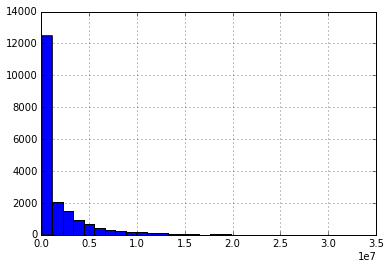

In [54]:
mlb['Salary'].hist(bins= 30)

{'boxes': [<matplotlib.lines.Line2D at 0xad04f9cc>],
 'caps': [<matplotlib.lines.Line2D at 0xacf6fe6c>,
 'fliers': [<matplotlib.lines.Line2D at 0xacf75e4c>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xacf758ec>],
 'whiskers': [<matplotlib.lines.Line2D at 0xacf6f40c>,
  <matplotlib.lines.Line2D at 0xacf6f92c>]}

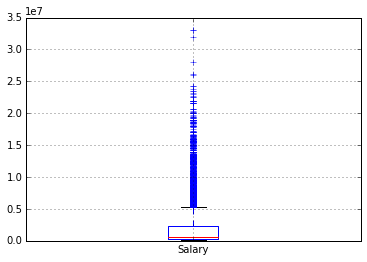

In [55]:
mlb.boxplot(column= 'Salary', return_type= 'dict')

A little more code allows us to plot the top salaries in a recent year

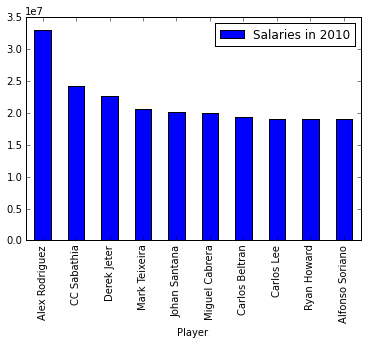

In [56]:
yr2010= mlb[mlb['Year']==2010]
yr2010.set_index('Player', inplace=True)
yr2010.head()

top10= yr2010['Salary'].sort_values(ascending= False).head(10)
plt.figure()
top10.plot(kind= 'bar', label= 'Salaries in 2010')
plt.legend()

## Grouping pandas dataframes

Impressive as the last bit of code is, it is difficult to do it for every year in the data. This is where the power of **split-apply-combine** methods become apparent. In pandas, this is implemented through the `groupby` command.

In [57]:
grouped= mlb.groupby('Year')
type(grouped)

pandas.core.groupby.DataFrameGroupBy

One problem of a grouped object is that its not so easy to look at it!

In [58]:
i= 0
for k,grp in grouped:
    i += 1
    if i >= 4:
        break
    print k
    print grp.head()

1988
   Year           Player   Salary           Position                Team
0  1988        Mike Witt  1400000            Pitcher  Los Angeles Angels
1  1988  George Hendrick   989333         Outfielder  Los Angeles Angels
2  1988      Chili Davis   950000         Outfielder  Los Angeles Angels
3  1988    Brian Downing   900000  Designated Hitter  Los Angeles Angels
4  1988        Bob Boone   883000            Catcher  Los Angeles Angels
1989
     Year         Player   Salary    Position                Team
686  1989      Mike Witt  1400000     Pitcher  Los Angeles Angels
687  1989    Chili Davis  1275000  Outfielder  Los Angeles Angels
688  1989  Brian Downing  1250000  Outfielder  Los Angeles Angels
689  1989  Bert Blyleven  1225000     Pitcher  Los Angeles Angels
690  1989  Lance Parrish  1000000     Catcher  Los Angeles Angels
1990
      Year         Player   Salary       Position                Team
1396  1990  Lance Parrish  1916667        Catcher  Los Angeles Angels
1397  1990 

Findng the top salary per group is not too hard, using a `max` on the grouped object. Similarly many other normal functions can be applied directly on the grouped object. 

In [59]:
grouped['Salary'].max().head(20)

Year
1988     2360714
1989     2766666
1990     3200000
1991     3800000
1992     6100000
1993     6200000
1994     6300000
1995     9237500
1996     9237500
1997    10000000
1998    10000000
1999    11949794
2000    15714286
2001    22000000
2002    22000000
2003    22000000
2004    22500000
2005    26000000
2006    21680727
2007    23428571
Name: Salary, dtype: int64

An interesting thing about grouped objects is that it allows you to apply multiple functions on multiple columns using the `agg` method. This is a useful method to apply generic functions on a grouped object. Unfortunately, `agg` cannot be used directly on dataframes.

In [60]:
ll= auto.groupby('make', as_index= False).agg( {'price': np.mean, 
                                                'weight': np.std, 
                                                'length': np.max, 
                                                'adjusted_price': np.median} )
ll

,make,price,adjusted_price,length,weight
0,AMC,4215.666667,4099.0,186,356.978057
1,Audi,9690.000000,10659.0,189,NaN
2,BMW,9735.000000,10708.5,177,NaN
3,Buick,6075.285714,5189.0,222,601.593123
4,Cadillac,13930.333333,14500.0,221,237.557011
5,Chevrolet,4372.333333,4229.5,212,560.773276
6,Datsun,6006.500000,6219.4,184,302.269196


But now the goal is to find the player with the highest salary in each year. This is more tricky! Try it out!

In [61]:
k= (grp.sort_values(by= 'Salary', ascending= False)[:1] 
    for yr,grp in grouped)
topSalaries= pd.DataFrame()
for line in k:
    topSalaries= topSalaries.append(line)
topSalaries.head(10)

,Year,Player,Salary,Position,Team
321,1988,Gary Carter,2360714,Catcher,New York Mets
908,1989,Orel Hershiser,2766666,Pitcher,Los Angeles Dodgers
1580,1990,Robin Yount,3200000,Outfielder,Milwaukee Brewers
2590,1991,Darryl Strawberry,3800000,Outfielder,Los Angeles Dodgers
3441,1992,Bobby Bonilla,6100000,Outfielder,New York Mets
4214,1993,Bobby Bonilla,6200000,Outfielder,New York Mets
4977,1994,Bobby Bonilla,6300000,Third Baseman,New York Mets
6068,1995,Cecil Fielder,9237500,First Baseman,Detroit Tigers
6840,1996,Cecil Fielder,9237500,First Baseman,Detroit Tigers
7666,1997,Albert Belle,10000000,Outfielder,Chicago White Sox


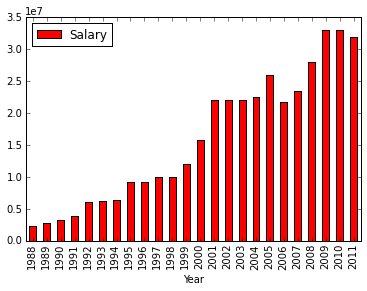

In [62]:
ts= topSalaries[['Year', 'Salary']]
ts= ts.set_index('Year')
ts.plot(kind= 'bar', color= 'red')

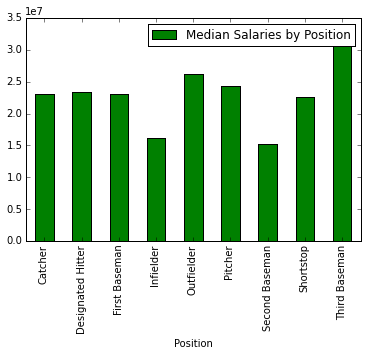

In [65]:
grouped= mlb.groupby('Position')
grouped['Salary'].max().plot(kind= 'bar', 
                                color= 'green', 
                                label= 'Median Salaries by Position')
plt.legend()

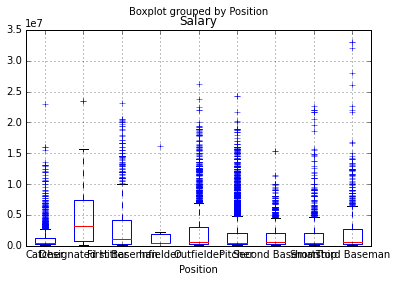

In [66]:
mlb.boxplot(column= 'Salary', by= 'Position')

# Where to go Next

[Pandas documentation & Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html) -- the customary doc link

[Python for Data Analysis](http://www.cin.ufpe.br/~embat/Python%20for%20Data%20Analysis.pdf)  -- Wes McKinney

[CS 109](http://cs109.github.io/2015/) Harvard CS Online Course (Hosted on Github)

## Lambda Functions, `map`, `apply` and `applymap`

## Joining and Merging datasets in pandas


   Until.... next time!      -- *Harrison*